<a href="https://colab.research.google.com/github/ljm9748/deepstudy/blob/master/19_RNN2_imdb_lstm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf

print('gpu available : ', tf.test.is_gpu_available())

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.
gpu available :  True


In [0]:
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Conv1D, MaxPooling1D
from tensorflow.keras.datasets import imdb

import numpy
import matplotlib.pyplot as plt

# train, testset 나누기

In [3]:
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=5000)

17465344/17464789 [==============================] - 0s 0us/step


# 데이터 전처리


In [0]:
x_train = sequence.pad_sequences(x_train, maxlen=100)
x_test = sequence.pad_sequences(x_test, maxlen=100)

# 모델 설정, 컴파일, 실행

Conv1D(): 앞에서 배운 Conv2D()를 1차원식으로 표현한것. 컨볼루션층이 1차원 이동하는 배열도 1차원(p274참고!)

MaxPooling1D(): 앞에서 배운 2차원 1차원으로 표현한것. 정히진 구역안에서 가장 큰 값 다음층으로 넘기고 나머지 버림



In [5]:
model = Sequential()
model.add(Embedding(5000, 100))
model.add(Dropout(0.5))
model.add(Conv1D(64, 5, padding='valid', activation='relu',strides=1))
model.add(MaxPooling1D(pool_size=4))
model.add(LSTM(55))
model.add(Dense(1))
model.add(Activation('sigmoid'))
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 100)         500000    
_________________________________________________________________
dropout (Dropout)            (None, None, 100)         0         
_________________________________________________________________
conv1d (Conv1D)              (None, None, 64)          32064     
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, None, 64)          0         
_________________________________________________________________
lstm (LSTM)                  (None, 55)                26400     
_________________________________________________________________
dense (Dense)                (None, 1)                 56        
_________________________________________________________________
activation (Activation)      (None, 1)                 0

In [0]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [7]:
history = model.fit(x_train, y_train, batch_size=100, epochs=5, validation_data=(x_test, y_test))

Epoch 1/5
250/250 [==============================] - 4s 17ms/step - loss: 0.4566 - accuracy: 0.7646 - val_loss: 0.3343 - val_accuracy: 0.8509
Epoch 2/5
250/250 [==============================] - 4s 15ms/step - loss: 0.2940 - accuracy: 0.8772 - val_loss: 0.3374 - val_accuracy: 0.8508
Epoch 3/5
250/250 [==============================] - 4s 15ms/step - loss: 0.2485 - accuracy: 0.9002 - val_loss: 0.3287 - val_accuracy: 0.8568
Epoch 4/5
250/250 [==============================] - 4s 15ms/step - loss: 0.2138 - accuracy: 0.9156 - val_loss: 0.3511 - val_accuracy: 0.8526
Epoch 5/5
250/250 [==============================] - 4s 15ms/step - loss: 0.1786 - accuracy: 0.9324 - val_loss: 0.3683 - val_accuracy: 0.8560


In [8]:
print("\n Test Accuracy: %.4f" % (model.evaluate(x_test, y_test)[1]))


782/782 [==============================] - 3s 3ms/step - loss: 0.3685 - accuracy: 0.8560

 Test Accuracy: 0.8560


# 오차 출력, 그래프표현

In [0]:
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

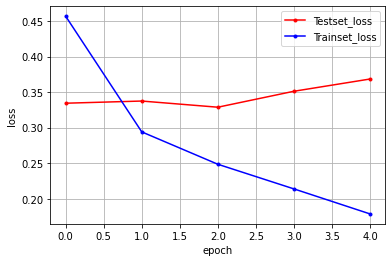

In [10]:
x_len = numpy.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c="red", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')

plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()